In [1]:
%run radiomorpho.py
from skimage.filters import threshold_otsu, threshold_local
import warnings; warnings.simplefilter('ignore')

dirs = ('101first_fit', '101nvss_fit')
files, images = readImagesFromDirs(dirs)

error reading image 101first_fit/J0331-2849_z1.0890p_1.09Mpc.fi.fit or 101nvss_fit/J0331-2849_z1.0890p_1.09Mpc.nv.fit


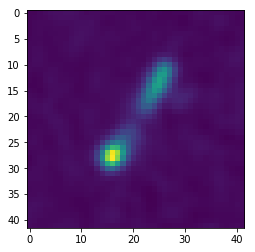

In [4]:
img = images[:,1][1]
plt.imshow(img)

In [143]:
def sphere_elem(rad):
    l      = 2 * rad + 1
    elem   = np.zeros((l , l), dtype='float')
    center = np.array((rad, rad))
    for i in range(l):
        for j in range(l):
            d = np.linalg.norm( center - np.array([i, j]) )
            elem[i, j] = d
#     elem /= elem.max()
    return elem

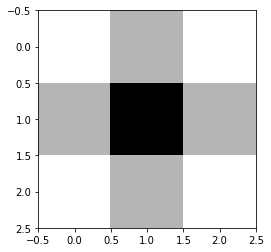

In [130]:
plt.imshow(sphere_elem(1), cmap='gray')

In [146]:
elem = sphere_elem(2)
elem.max() - elem

array([[0.        , 0.59235915, 0.82842712, 0.59235915, 0.        ],
       [0.59235915, 1.41421356, 1.82842712, 1.41421356, 0.59235915],
       [0.82842712, 1.82842712, 2.82842712, 1.82842712, 0.82842712],
       [0.59235915, 1.41421356, 1.82842712, 1.41421356, 0.59235915],
       [0.        , 0.59235915, 0.82842712, 0.59235915, 0.        ]])

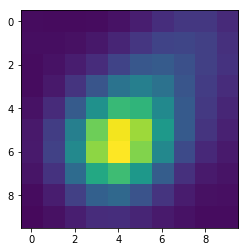

In [82]:
sub_img = img[22:32, 12:22]
plt.imshow(sub_img, vmin=0, vmax=1)

In [194]:
def erosion_sphere(img, r):
    m_img = np.copy(img)
    elem = sphere_elem(r)
    a, b = elem.shape
    l, m = m_img.shape
    for i in range(l):
        for j in range(m):
            scale = m_img[i, j]
            for x in range(a):
                i_x = i + (x - r) #x - r gives us absolute pos for -r to r
                if (i_x < 0 or i_x >= l): continue #don't allow negative indexes
                for y in range(b):
                    j_y = j + (y - r) #y - r gives us absolute pos for -r to r
                    if(j_y < 0 or j_y >= m): continue #don't allow negative indexes
                    val = img[i_x, j_y] 
                    if(val < elem[x, y] * scale):
                        scale = val
            m_img[i, j] = scale
    return m_img

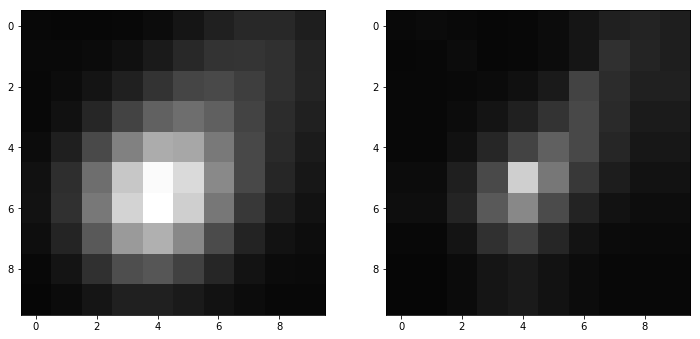

In [195]:
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(sub_img, vmin=0, vmax=1, cmap='gray')
e_img = erosion_sphere(sub_img, 1)
ax[1].imshow(erosion_sphere(sub_img, 1), vmin=0, vmax=1, cmap='gray')
plt.show()

In [170]:
e_img

array([[0.02676147, 0.02502644, 0.02502644, 0.02502644, 0.02502644,
        0.02502644, 0.02502644, 0.02502644, 0.02502644, 0.02502644],
       [0.01769637, 0.01769637, 0.01769637, 0.01769637, 0.01769637,
        0.01769637, 0.01769637, 0.01769637, 0.01769637, 0.01769637],
       [0.01251322, 0.01251322, 0.01251322, 0.01251322, 0.01251322,
        0.01251322, 0.01251322, 0.01251322, 0.01251322, 0.01251322],
       [0.00884818, 0.00884818, 0.00884818, 0.00884818, 0.00884818,
        0.00884818, 0.00884818, 0.00884818, 0.00884818, 0.00884818],
       [0.00625661, 0.00625661, 0.00625661, 0.00625661, 0.00625661,
        0.00625661, 0.00625661, 0.00625661, 0.00625661, 0.00625661],
       [0.00442409, 0.00442409, 0.00442409, 0.00442409, 0.00442409,
        0.00442409, 0.00442409, 0.00442409, 0.00442409, 0.00442409],
       [0.00312831, 0.00312831, 0.00312831, 0.00312831, 0.00312831,
        0.00312831, 0.00312831, 0.00312831, 0.00312831, 0.00312831],
       [0.00221205, 0.00221205, 0.0022120

In [175]:
def dilation_sphere(img, r):
    m_img = np.copy(img)
    elem = sphere_elem(r)
    a, b = elem.shape
    l, m = m_img.shape
    for i in range(l):
        for j in range(m):
            scale = m_img[i, j]
            for x in range(a):
                i_x = i + (x - r) #x - r gives us absolute pos for -r to r
                if (i_x < 0 or i_x >= l): continue #don't allow negative indexes
                for y in range(b):
                    j_y = j + (y - r) #y - r gives us absolute pos for -r to r
                    if(j_y < 0 or j_y >= m): continue #don't allow negative indexes
                    val = img[i_x, j_y] 
                    if(val > elem[x, y] * scale):
                        scale = val
            m_img[i, j] = scale
    return m_img

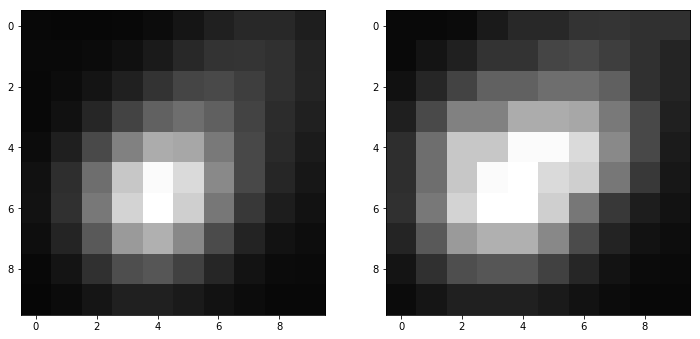

In [176]:
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(sub_img, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(dilation_sphere(sub_img, 1), vmin=0, vmax=1, cmap='gray')
plt.show()

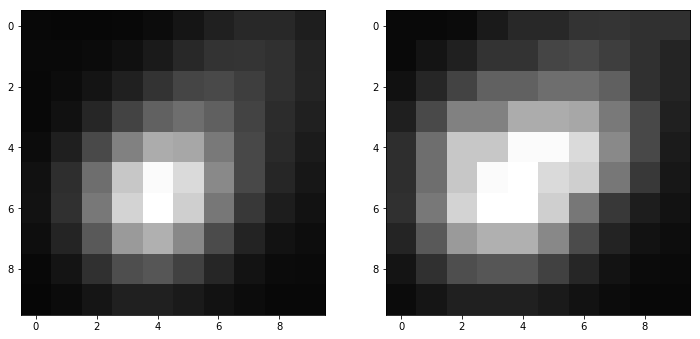

In [210]:
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(sub_img, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(dilation_sphere(sub_img, 1), vmin=0, vmax=1, cmap='gray')
plt.show()

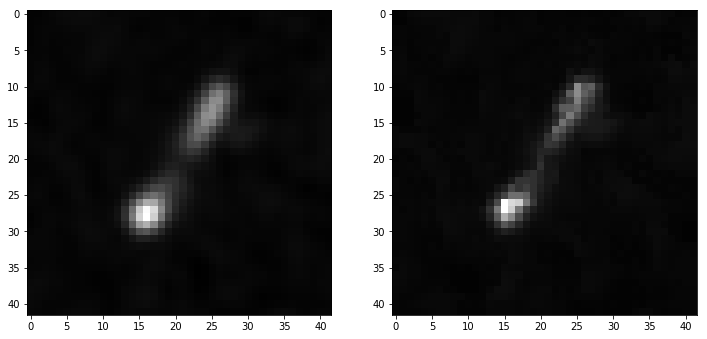

In [201]:
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(img, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(erosion_sphere(dilation_sphere(img, 1), 1), vmin=0, vmax=1, cmap='gray')
plt.show()

In [202]:
def opening_sphere(img, r):
    return erosion_sphere(dilation_sphere(img, r), r)
def closing_sphere(img, r):
    return dilation_sphere(erosion_sphere(img, r), r)

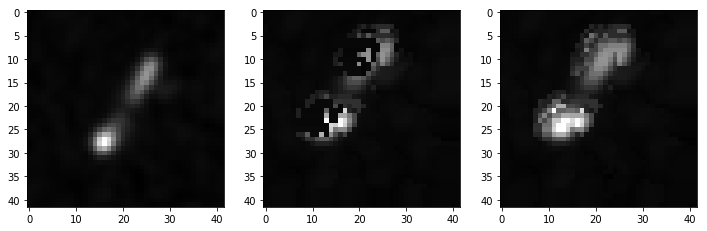

In [204]:
r = 3
f, ax = plt.subplots(1, 3, figsize=(12,15))
ax[0].imshow(img, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(opening(img, r), vmin=0, vmax=1, cmap='gray')
ax[2].imshow(closing(img, r), vmin=0, vmax=1, cmap='gray')
plt.show()

In [242]:
img.min()

0.0

In [249]:
def erosion_sphere_m(img, r):
    m_img = np.copy(img)
    elem = sphere_elem(r)
    a, b = elem.shape
    l, m = m_img.shape
    scale = img.mean()
    elem *= scale
    for i in range(l):
        for j in range(m):
            h = img[i, j] - elem[r, r]
            for x in range(a):
                i_x = i + (x - r) #x - r gives us absolute pos for -r to r
                if (i_x < 0 or i_x >= l): continue #don't allow negative indexes
                for y in range(b):
                    j_y = j + (y - r) #y - r gives us absolute pos for -r to r
                    if(j_y < 0 or j_y >= m): continue #don't allow negative indexes
                    val = img[i_x, j_y] 
                    if(val < elem[x, y] + h):
                        h = val - elem[x, y]
            n_val = h + elem[r, r]
            m_img[i, j] = n_val if n_val > 0 else 0
    return m_img


def dilation_sphere_m(img, r):
    m_img = np.copy(img)
    elem = sphere_elem(r)
    a, b = elem.shape
    l, m = m_img.shape
    scale = img.mean()
    elem *= scale
    for i in range(l):
        for j in range(m):
            h = img[i, j] - elem[r, r]
            for x in range(a):
                i_x = i + (x - r) #x - r gives us absolute pos for -r to r
                if (i_x < 0 or i_x >= l): continue #don't allow negative indexes
                for y in range(b):
                    j_y = j + (y - r) #y - r gives us absolute pos for -r to r
                    if(j_y < 0 or j_y >= m): continue #don't allow negative indexes
                    val = img[i_x, j_y] 
                    if(val > elem[x, y] + h):
                        h = val - elem[x, y]
            n_val = h + elem[r, r]
            m_img[i, j] = n_val if n_val > 0 else 0
    return m_img

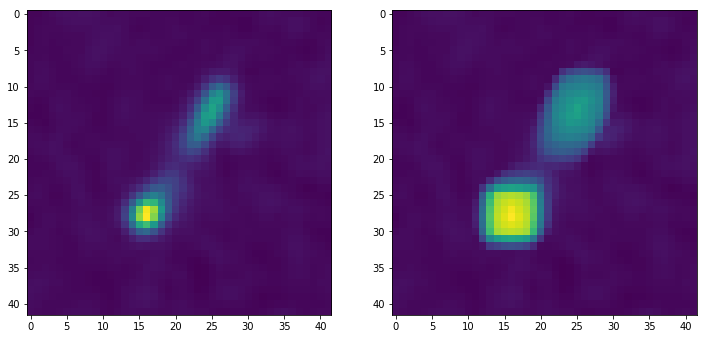

In [260]:
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(img, vmin=0, vmax=1)
e_img = dilation_sphere_m(img, 2)
ax[1].imshow(e_img, vmin=0, vmax=1)
plt.show()

In [261]:
def opening_sphere(img, r):
    return erosion_sphere_m(dilation_sphere_m(img, r), r)
def closing_sphere(img, r):
    return dilation_sphere_m(erosion_sphere_m(img, r), r)

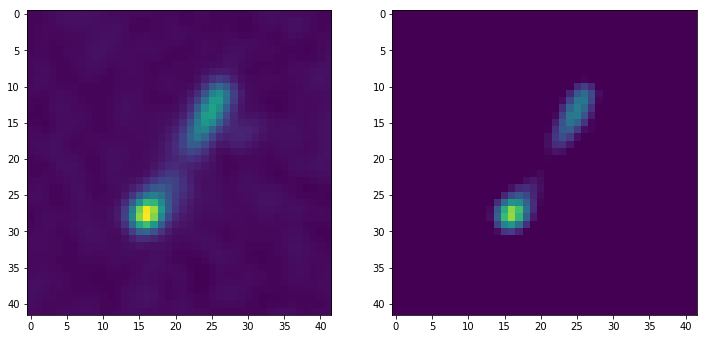

In [271]:
f, ax = plt.subplots(1, 2, figsize=(12,15))
ax[0].imshow(img, vmin=0, vmax=1)
e_img = opening_sphere(img, 1)
ax[1].imshow(e_img, vmin=0, vmax=1)
plt.show()